In [87]:
# importamos las librerías

In [89]:
# librería para visualizar los gráficos
%matplotlib inline

In [91]:
# importamos pandas
import pandas as pd

In [93]:
# Cargamos el archivo de la data limpia
compras_df_2024=pd.read_csv('data/clean_compras_2024.csv')

In [95]:
# Visualizamos los primeros 4 registros
compras_df_2024.head(4)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET
0,126753,INFONAVIT,INF7205011ZA,AP-BIM6-2023-183010-1,NO APLICA,APORTACION PATRONAL - BIMESTRE 6 - Nov y Dic 2023,TR,351000898.0,2024-01-17,2429742.44,CONTRATISTAS
1,126753,INFONAVIT,INF7205011ZA,AE-BIM6-2023-183010-2,NO APLICA,DESCUENTO SOBRE NOMINA CORRESPONDIENTE AL PAGO...,TR,351000899.0,2024-01-17,906239.26,CONTRATISTAS
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 3403-185004-3,NO APLICA,REINTEGRO AL FDO. RAMO 33-FDO DE INF.SOCIAL MC...,TR,1029199.0,2024-01-17,4889.00,CONTRATISTAS
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS AL 31 ...,TR,353000038.0,2024-01-17,1674610.00,CONTRATISTAS


### **VISION GENERAL DEL DATASET**

In [101]:
# Visualizamos las columnas del dataset
compras_df_2024.columns

Index(['C B', 'BENEFICIARIO', 'RFC', 'FACTURAS', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO - #OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [103]:
# Visualizamos los tipos de datos
compras_df_2024.dtypes

C B               int64
BENEFICIARIO     object
RFC              object
FACTURAS         object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO - #OP       float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [105]:
# Visualizamos los datos estadisticos de los campos numéricos
compras_df_2024.describe()

,C B,FDO - #OP,IMPORTE
count,13742.000000,1.374200e+04,1.374200e+04
mean,224488.194149,1.736442e+08,5.256587e+05
std,105054.759920,1.822559e+08,2.519044e+06
min,110036.000000,1.029196e+06,1.200000e-01
25%,123307.000000,1.030765e+06,3.551550e+03
50%,212000.000000,1.111830e+06,2.390728e+04
75%,318531.000000,3.720000e+08,1.587067e+05
max,999999.000000,6.040001e+08,7.767063e+07


In [36]:
# Seleccionamos las columnas de interés
compras_df_2024=compras_df_2024[['BENEFICIARIO','FACTURAS', 'CONTRATO', 'CONCEPTO','TIPO','FECHA','IMPORTE','SHEET']]

In [107]:
# Verificamos las 4 primeras filas del nuevo dataframe
compras_df_2024.head(4)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET
0,126753,INFONAVIT,INF7205011ZA,AP-BIM6-2023-183010-1,NO APLICA,APORTACION PATRONAL - BIMESTRE 6 - Nov y Dic 2023,TR,351000898.0,2024-01-17,2429742.44,CONTRATISTAS
1,126753,INFONAVIT,INF7205011ZA,AE-BIM6-2023-183010-2,NO APLICA,DESCUENTO SOBRE NOMINA CORRESPONDIENTE AL PAGO...,TR,351000899.0,2024-01-17,906239.26,CONTRATISTAS
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 3403-185004-3,NO APLICA,REINTEGRO AL FDO. RAMO 33-FDO DE INF.SOCIAL MC...,TR,1029199.0,2024-01-17,4889.00,CONTRATISTAS
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS AL 31 ...,TR,353000038.0,2024-01-17,1674610.00,CONTRATISTAS


### **ANALISIS UNIDIMENSIONAL**

In [44]:
# Visualizamos la cantidad de datos por cada Sheet
compras_df_2024['SHEET'].value_counts()

SHEET
CONTRATISTAS      7234
GASTOS VARIOS     3907
PERSONALES        1178
COMUNICACION      1082
SERVICIOS          284
REPRESENTACION      57
Name: count, dtype: int64

In [115]:
# Determinamos los valores únicos correspondiente al TIPO
compras_df_2024['TIPO'].unique()

array(['TR', 'CH'], dtype=object)

In [54]:
# Cantidad de datos Únicos en la columna Sheet

In [56]:
compras_df_2024['SHEET'].unique()

array(['CONTRATISTAS', 'GASTOS VARIOS', 'SERVICIOS', 'COMUNICACION',
       'REPRESENTACION', 'PERSONALES'], dtype=object)

In [119]:
# Contamos los beneficiarios
# Verificamos el número de facturas por proveedor
compras_df_2024['BENEFICIARIO'].value_counts()

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    1825
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONST (CMIC)     735
INTERASFALTOS, S.A. DE C.V.                            404
TOP MEDICAL, S.A. DE C.V.                              294
MOTO SOLUCIONES MEXICO, S.A. DE C.V.                   253
                                                      ... 
BOCANEGRA MARTINEZ JOSE DE JESUS                         1
GARZA RENTERIA GUADALUPE                                 1
GARZA FLORES ENRIQUE                                     1
CASTRO MEDINA OSCAR DANIEL                               1
CANTU MORALES ALVARO EUGENIO                             1
Name: count, Length: 1818, dtype: int64

In [60]:
# Visualizar los 10 primeros beneficiarios
compras_df_2024['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION       1825
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONST (CMIC)        735
INTERASFALTOS, S.A. DE C.V.                               404
TOP MEDICAL, S.A. DE C.V.                                 294
MOTO SOLUCIONES MEXICO, S.A. DE C.V.                      253
MUNICIPIO DE LA CIUDAD DE MONTERREY                       229
EDITORA EL SOL, S.A. DE C.V.                              226
CAR ONE MONTERREY, S.A. DE C.V.                           220
ORSAN DEL NORTE, S.A. DE C.V.                             175
SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL EDO DE NL     166
Name: count, dtype: int64

In [125]:
# Analizar el gasto total en compras de Enero hasta Agosto de 2024

In [127]:
compras_df_2024['IMPORTE']

0        2429742.44
1         906239.26
2           4889.00
3        1674610.00
4        2356642.00
            ...    
13737       1871.49
13738       2481.47
13739       2481.47
13740        825.68
13741       2064.20
Name: IMPORTE, Length: 13742, dtype: float64

<Axes: >

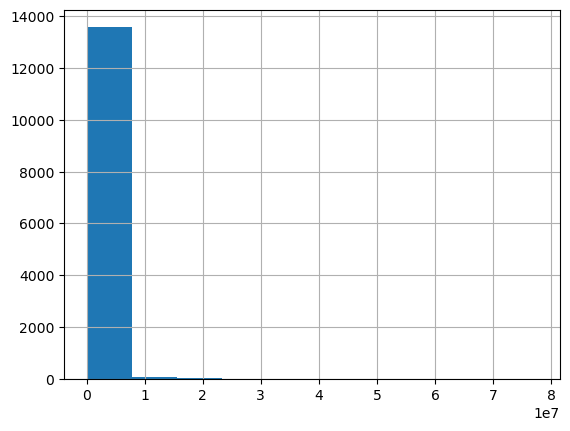

In [129]:
# Creamos un histograma 
compras_df_2024['IMPORTE'].hist()

<Axes: >

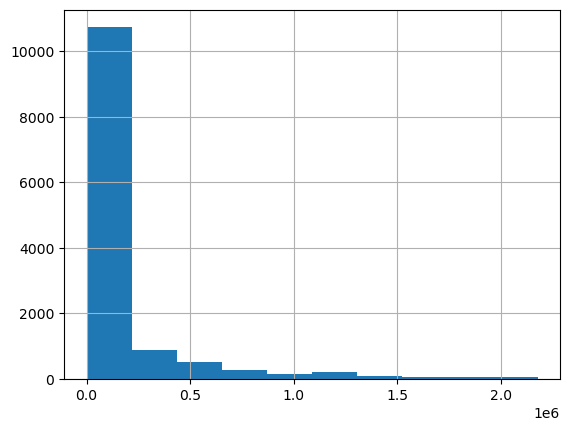

In [131]:
# Quitamos el 5% de los datos más altos
compras_df_2024[compras_df_2024['IMPORTE'] < compras_df_2024['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET
1,126753,INFONAVIT,INF7205011ZA,AE-BIM6-2023-183010-2,NO APLICA,DESCUENTO SOBRE NOMINA CORRESPONDIENTE AL PAGO...,TR,351000899.0,2024-01-17,906239.26,CONTRATISTAS
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 3403-185004-3,NO APLICA,REINTEGRO AL FDO. RAMO 33-FDO DE INF.SOCIAL MC...,TR,1029199.0,2024-01-17,4889.00,CONTRATISTAS
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS AL 31 ...,TR,353000038.0,2024-01-17,1674610.00,CONTRATISTAS
5,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 9455-185004-2,NO APLICA,PROAGUA-2023 REINTEGRO DE PRODUCTOS FINANCIERO...,TR,360000018.0,2024-01-17,377088.00,CONTRATISTAS
6,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,012024REINT-183006-5,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS CORRE...,TR,353000039.0,2024-01-22,4718.00,CONTRATISTAS


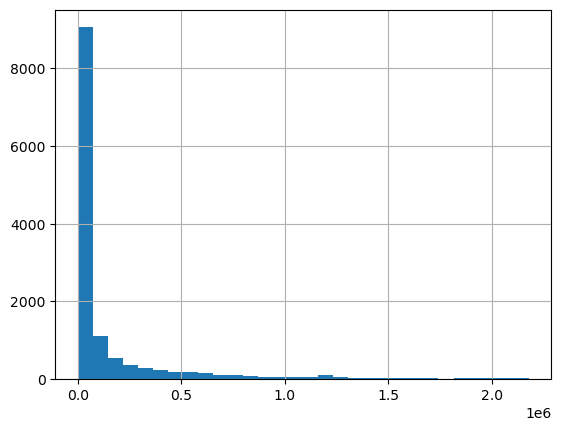

In [133]:
# Dividimos en 30 intervalos
compras_df_2024[compras_df_2024['IMPORTE'] < compras_df_2024['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=30)
compras_df_2024[compras_df_2024['IMPORTE'] < compras_df_2024['IMPORTE'].quantile(0.95)].head(5)

In [137]:
# Analizar el Fondo y Número de Operación de Enero hasta Agosto de 2024

In [139]:
compras_df_2024['FDO - #OP']

0        351000898.0
1        351000899.0
2          1029199.0
3        353000038.0
4        354000119.0
            ...     
13737    373000509.0
13738    373000510.0
13739    373000511.0
13740    373000512.0
13741    373000513.0
Name: FDO - #OP, Length: 13742, dtype: float64

<Axes: >

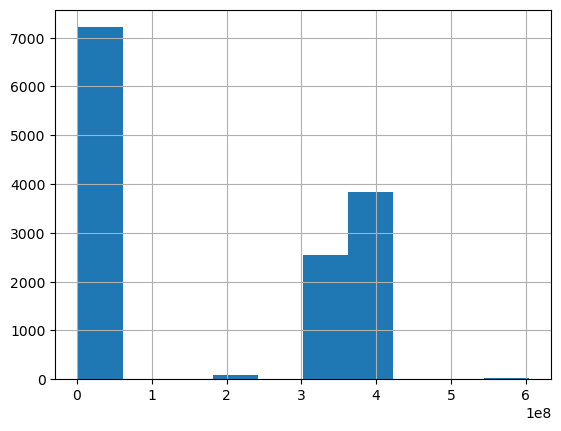

In [141]:
# Creamos un histograma 
compras_df_2024['FDO - #OP'].hist()

<Axes: >

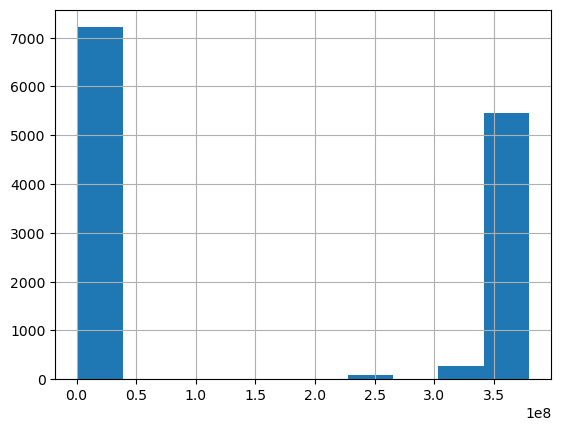

In [143]:
# Quitamos el 5% de los datos más altos
compras_df_2024[compras_df_2024['FDO - #OP'] < compras_df_2024['FDO - #OP'].quantile(0.95)]['FDO - #OP'].hist()

In [ ]:
# Analizamos las transacciones que representan el 95% inferior en relación a la cantidad de operaciones, 
# para entender las transacciones más comunes o de menor impacto financiero.

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET
0,126753,INFONAVIT,INF7205011ZA,AP-BIM6-2023-183010-1,NO APLICA,APORTACION PATRONAL - BIMESTRE 6 - Nov y Dic 2023,TR,351000898.0,2024-01-17,2429742.44,CONTRATISTAS
1,126753,INFONAVIT,INF7205011ZA,AE-BIM6-2023-183010-2,NO APLICA,DESCUENTO SOBRE NOMINA CORRESPONDIENTE AL PAGO...,TR,351000899.0,2024-01-17,906239.26,CONTRATISTAS
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 3403-185004-3,NO APLICA,REINTEGRO AL FDO. RAMO 33-FDO DE INF.SOCIAL MC...,TR,1029199.0,2024-01-17,4889.00,CONTRATISTAS
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS AL 31 ...,TR,353000038.0,2024-01-17,1674610.00,CONTRATISTAS
4,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 0468-185004-1,NO APLICA,FISM-2023 REINTEGRO DE PRODUCTOS FINANCIEROS G...,TR,354000119.0,2024-01-17,2356642.00,CONTRATISTAS


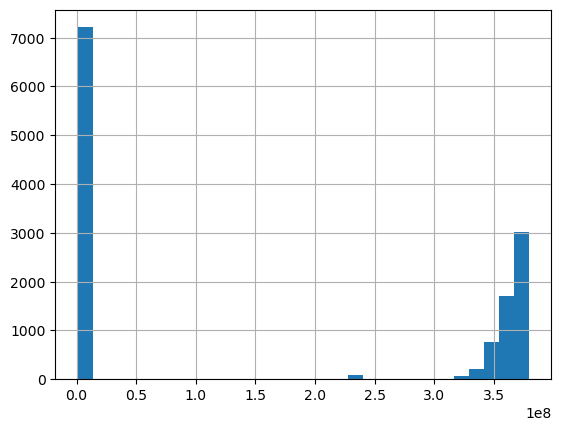

In [145]:
# Dividimos en 30 intervalos
compras_df_2024[compras_df_2024['FDO - #OP'] < compras_df_2024['FDO - #OP'].quantile(0.95)]['FDO - #OP'].hist(bins=30)
compras_df_2024[compras_df_2024['FDO - #OP'] < compras_df_2024['FDO - #OP'].quantile(0.95)].head(5)

In [332]:
# Analizamos las transacciones por Fecha
# Convertimos la Fecha
compras_df_2024['FECHA'] = pd.to_datetime(compras_df_2024['FECHA'])

In [165]:
# Agrupamos por mes
compras_df_2024['MES'] = compras_df_2024['FECHA'].dt.to_period('M')
compras_df_2024['MES'] = compras_df_2024['FECHA'].dt.month
compras_df_2024.head()

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET,MES
0,126753,INFONAVIT,INF7205011ZA,AP-BIM6-2023-183010-1,NO APLICA,APORTACION PATRONAL - BIMESTRE 6 - Nov y Dic 2023,TR,351000898.0,2024-01-17,2429742.44,CONTRATISTAS,1
1,126753,INFONAVIT,INF7205011ZA,AE-BIM6-2023-183010-2,NO APLICA,DESCUENTO SOBRE NOMINA CORRESPONDIENTE AL PAGO...,TR,351000899.0,2024-01-17,906239.26,CONTRATISTAS,1
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 3403-185004-3,NO APLICA,REINTEGRO AL FDO. RAMO 33-FDO DE INF.SOCIAL MC...,TR,1029199.0,2024-01-17,4889.00,CONTRATISTAS,1
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS AL 31 ...,TR,353000038.0,2024-01-17,1674610.00,CONTRATISTAS,1
4,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 0468-185004-1,NO APLICA,FISM-2023 REINTEGRO DE PRODUCTOS FINANCIEROS G...,TR,354000119.0,2024-01-17,2356642.00,CONTRATISTAS,1


In [167]:
# Contamos las transacciones por mes
compras_df_2024['MES'].value_counts().sort_index()

MES
1     134
2    1117
3    1960
4    1632
5    2226
6    1776
7    2044
8    2853
Name: count, dtype: int64

<Axes: >

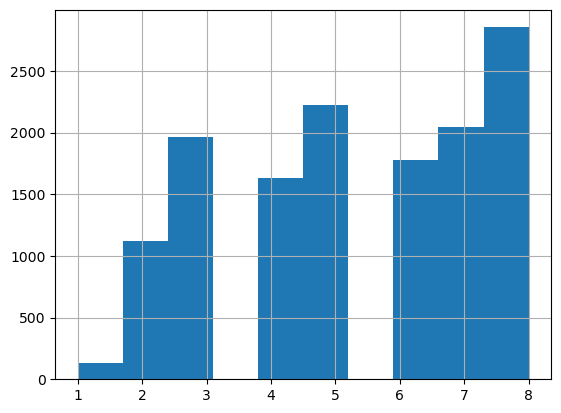

In [169]:
# Creamos el histograma
compras_df_2024['MES'].hist()
# Evidenciamos mayor cantidad de transacciones en el mes de Agosto

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET,MES
0,126753,INFONAVIT,INF7205011ZA,AP-BIM6-2023-183010-1,NO APLICA,APORTACION PATRONAL - BIMESTRE 6 - Nov y Dic 2023,TR,351000898.0,2024-01-17,2429742.44,CONTRATISTAS,1
1,126753,INFONAVIT,INF7205011ZA,AE-BIM6-2023-183010-2,NO APLICA,DESCUENTO SOBRE NOMINA CORRESPONDIENTE AL PAGO...,TR,351000899.0,2024-01-17,906239.26,CONTRATISTAS,1
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 3403-185004-3,NO APLICA,REINTEGRO AL FDO. RAMO 33-FDO DE INF.SOCIAL MC...,TR,1029199.0,2024-01-17,4889.00,CONTRATISTAS,1
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DE RENDIMIENTOS NO DEVENGADOS AL 31 ...,TR,353000038.0,2024-01-17,1674610.00,CONTRATISTAS,1
4,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,L-CAPTURA 0468-185004-1,NO APLICA,FISM-2023 REINTEGRO DE PRODUCTOS FINANCIEROS G...,TR,354000119.0,2024-01-17,2356642.00,CONTRATISTAS,1


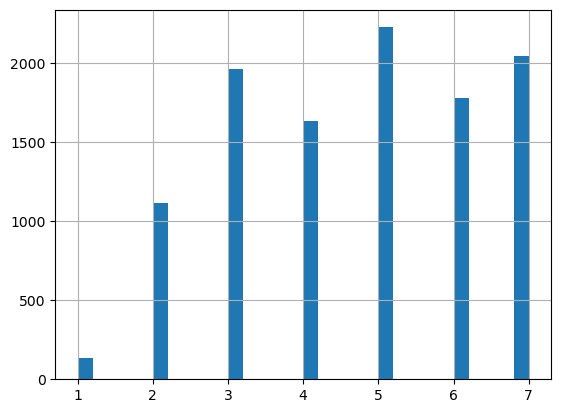

In [173]:
# Dividimos en 30 intervalos
compras_df_2024[compras_df_2024['MES'] < compras_df_2024['MES'].quantile(0.95)]['MES'].hist(bins=30)
compras_df_2024[compras_df_2024['MES'] < compras_df_2024['MES'].quantile(0.95)].head(5)

### **ANALISIS MULTIDIMENSIONAL**

In [195]:
# Cargamos la data principal
compras_df_2024=pd.read_csv('data/clean_compras_2024.csv')
compras_df_2024.dtypes

C B               int64
BENEFICIARIO     object
RFC              object
FACTURAS         object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO - #OP       float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [197]:
# Seleccionamos las columnas de interés
compras_df_2024=compras_df_2024[['BENEFICIARIO','FACTURAS', 'CONTRATO', 'CONCEPTO','TIPO','FECHA','IMPORTE','SHEET']]

In [199]:
# Agrupamos el valor de las facturas por cada Beneficiario
sum_importe_beneficiario=compras_df_2024.groupby('BENEFICIARIO').sum()['IMPORTE']

In [201]:
sum_importe_beneficiario

BENEFICIARIO
A.R. CANALES S.C.                                  20398.64
ABAD MORENO MILCA SARAI                             8925.91
ABASTECEDORA DE EMPACADORAS Y RASTROS SA DE CV     20783.52
ABUNDIS  ALBERTO                                  316296.22
ABURTO HERRERA ANDREA MARIA DE LOS ANGELES         30518.37
                                                    ...    
ZAVALA ROMERO OMAR                                 10458.85
ZEPEDA GONZALEZ DANIEL MARINO                      17690.88
ZUÑIGA FRIAS MARIBEL                               21536.42
ZUÑIGA GUERRERO MARTHA                             68319.74
ZUÑIGA RAMIREZ ERIKA JAZMIN                       203636.56
Name: IMPORTE, Length: 1818, dtype: float64

In [209]:
# Ordenamos el importe de los beneficiarios de manera descendente, seleccionamos los 10 primeros registros
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,BENEFICIARIO,IMPORTE
1193,MUNICIPIO DE LA CIUDAD DE MONTERREY,1.264554e+09
878,INFORMACIÓN RESERVADA DE CONFORMIDAD CON ACUER...,3.222278e+08
527,ESMA INSTALACIONES S A DE C V,2.707935e+08
1395,"RED RECOLECTOR, S.A. DE C.V.",2.530997e+08
905,"INTERASFALTOS, S.A. DE C.V.",2.105657e+08
1576,SERVICIO DE ADMINISTRACION TRIBUTARIA,1.889182e+08
340,"CONSTRU-SHENSA, SA. DE CV.",1.734824e+08
290,CFE SUMINISTRADOR DE SERVICIOS BASICOS,1.732053e+08
1605,SINERGIA EN TRATAMIENTO DE AGUA S.A. DE C.V.,1.705737e+08
856,"HISA FARMACEUTICA, S.A. DE C.V.",1.580262e+08


<Axes: xlabel='BENEFICIARIO'>

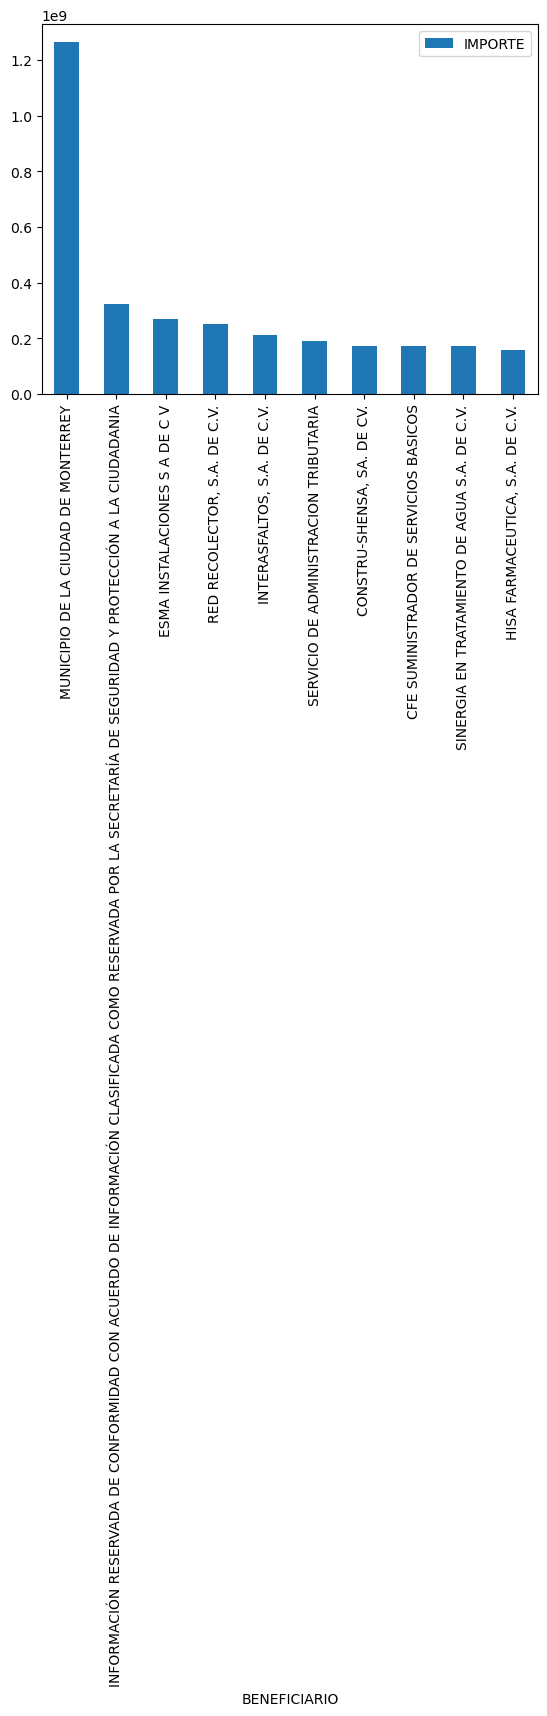

In [213]:
# Graficamos los 10 beneficiarios con los importes más altos
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO',y='IMPORTE')

In [215]:
# Determinamos el gasto promedio por cada hoja o categoría
mean_importe_sheet=compras_df_2024.groupby('SHEET')['IMPORTE'].mean()
mean_importe_sheet

SHEET
COMUNICACION      111244.274399
CONTRATISTAS      521340.031485
GASTOS VARIOS     802559.256401
PERSONALES         41047.114915
REPRESENTACION     15245.197193
SERVICIOS         517748.297430
Name: IMPORTE, dtype: float64

<Axes: xlabel='SHEET'>

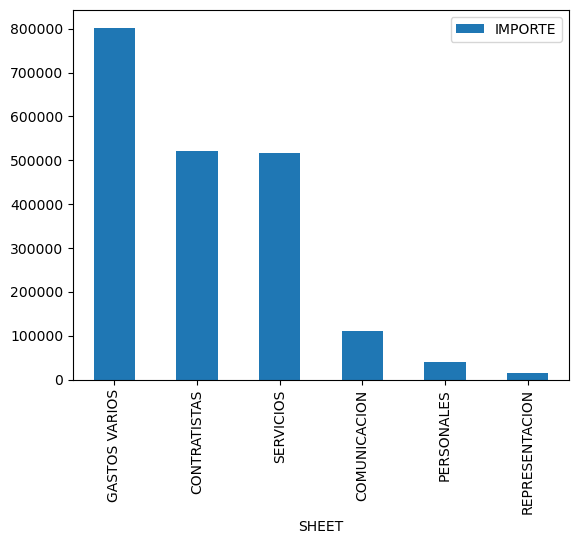

In [217]:
# Graficamos el gasto promedio por categoría
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET',y='IMPORTE')

In [277]:
# Determinamos los gastos por fecha
sum_importe_fecha=compras_df_2024.groupby('FECHA').sum()['IMPORTE']
sum_importe_fecha

FECHA
2024-01-17    8.175532e+07
2024-01-22    1.431064e+06
2024-01-23    3.687500e+05
2024-01-24    3.574975e+06
2024-01-25    5.009674e+06
                  ...     
2024-08-23    1.386067e+08
2024-08-27    4.252710e+03
2024-08-28    1.354763e+05
2024-08-29    7.210649e+06
2024-08-30    3.247725e+08
Name: IMPORTE, Length: 150, dtype: float64

<Axes: xlabel='FECHA'>

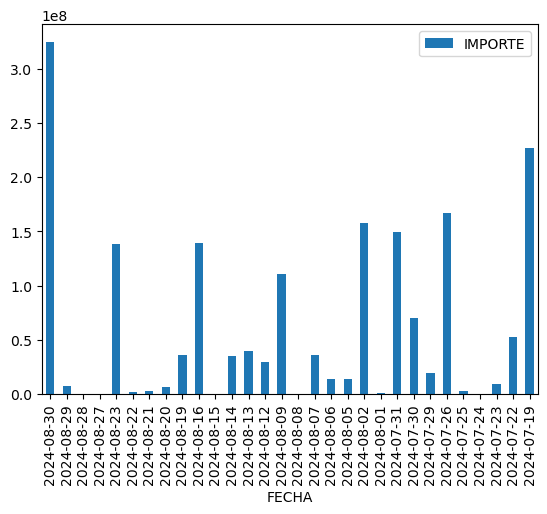

In [283]:
# Graficamos los gastos por fecha
sum_importe_fecha.reset_index().sort_values(by='FECHA', ascending=False).iloc[0:30].plot(kind='bar', x='FECHA',y='IMPORTE')

In [293]:
# Analizamos la distribución de los gastos por tipo
sum_importe_tipo=compras_df_2024.groupby('TIPO').sum()['IMPORTE']
sum_importe_tipo

TIPO
CH    1.310604e+08
TR    7.092542e+09
Name: IMPORTE, dtype: float64

In [295]:
sum_importe_tipo.reset_index().sort_values(by='TIPO', ascending=False)

,TIPO,IMPORTE
1,TR,7.092542e+09
0,CH,1.310604e+08


<Axes: xlabel='TIPO'>

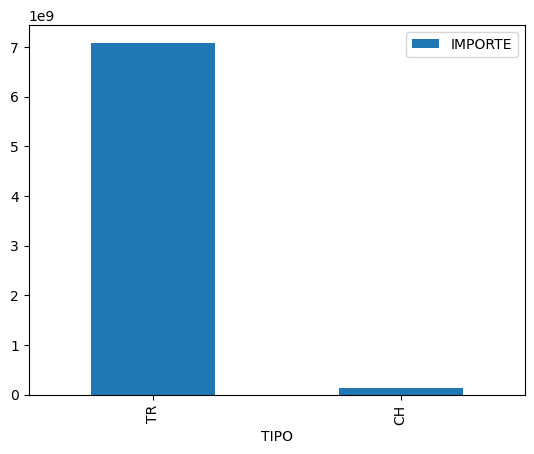

In [289]:
# Graficamos los gastos por tipo
sum_importe_tipo.reset_index().sort_values(by='TIPO', ascending=False).plot(kind='bar', x='TIPO',y='IMPORTE')

In [297]:
# Analizamos los Contratos en relación al Importe
sum_importe_contrato=compras_df_2024.groupby('CONTRATO').sum()['IMPORTE']
sum_importe_contrato

CONTRATO
DASSPC/0558/2024       1.249592e+04
DASSPC/1923/2024       1.874388e+04
DEM-SEDUSO/109/2024    6.337078e+04
DEM-SEDUSO/117/2024    6.337078e+04
DEM-SEDUSO/144/2024    6.337078e+04
                           ...     
SSP-350-2024           5.996349e+06
SSP-352-2024           4.174400e+06
SSP-354-2024           1.247507e+07
TES-075-2014           1.915809e+07
TES-217-2020           1.300183e+08
Name: IMPORTE, Length: 3560, dtype: float64

In [307]:
sum_importe_contrato = sum_importe_contrato.reset_index().sort_values(by='CONTRATO', ascending=False)
sum_importe_contrato

,index,CONTRATO,IMPORTE
6,3559,TES-217-2020,1.300183e+08
49,3558,TES-075-2014,1.915809e+07
78,3557,SSP-354-2024,1.247507e+07
181,3556,SSP-352-2024,4.174400e+06
135,3555,SSP-350-2024,5.996349e+06
...,...,...,...
1309,4,DEM-SEDUSO/144/2024,6.337078e+04
1307,3,DEM-SEDUSO/117/2024,6.337078e+04
1308,2,DEM-SEDUSO/109/2024,6.337078e+04
2140,1,DASSPC/1923/2024,1.874388e+04


<Axes: xlabel='CONTRATO'>

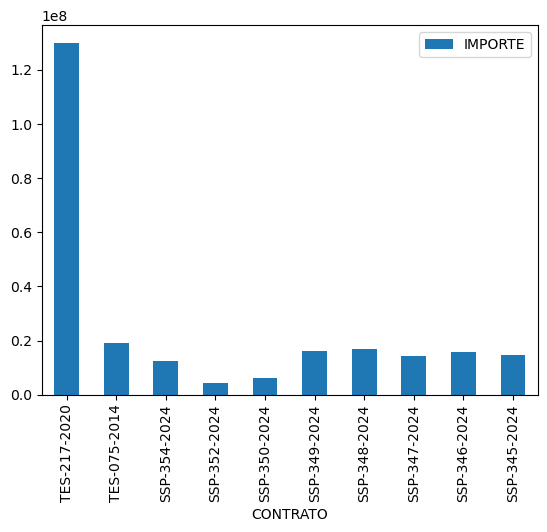

In [309]:
# Graficamos los 10 Contratos mas Costosos
sum_importe_contrato.reset_index().sort_values(by='CONTRATO', ascending=False).iloc[0:10].plot(kind='bar', x='CONTRATO',y='IMPORTE')

In [313]:
# Analizamos las Facturas por Beneficiario
facturas_beneficiario=compras_df_2024.groupby('BENEFICIARIO')['FACTURAS'].count()
facturas_beneficiario

BENEFICIARIO
A.R. CANALES S.C.                                 1
ABAD MORENO MILCA SARAI                           1
ABASTECEDORA DE EMPACADORAS Y RASTROS SA DE CV    1
ABUNDIS  ALBERTO                                  8
ABURTO HERRERA ANDREA MARIA DE LOS ANGELES        2
                                                 ..
ZAVALA ROMERO OMAR                                1
ZEPEDA GONZALEZ DANIEL MARINO                     2
ZUÑIGA FRIAS MARIBEL                              1
ZUÑIGA GUERRERO MARTHA                            1
ZUÑIGA RAMIREZ ERIKA JAZMIN                       2
Name: FACTURAS, Length: 1818, dtype: int64

In [315]:
facturas_beneficiario = facturas_beneficiario.reset_index().sort_values(by='FACTURAS', ascending=False)
facturas_beneficiario

,BENEFICIARIO,FACTURAS
190,CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUC...,1825
189,CAMARA MEXICANA DE LA INDUSTRIA DE LA CONST (C...,735
905,"INTERASFALTOS, S.A. DE C.V.",404
1664,"TOP MEDICAL, S.A. DE C.V.",294
1191,"MOTO SOLUCIONES MEXICO, S.A. DE C.V.",253
...,...,...
799,GUZMAN PRADO ELSA,1
797,GUTIERREZ SALGADO CYNTHIA SELENE,1
796,GUTIERREZ PIMENTEL ANABELLA,1
795,GUTIERREZ OSORIO YESENIA PATRICIA DE JESUS,1


<Axes: xlabel='BENEFICIARIO'>

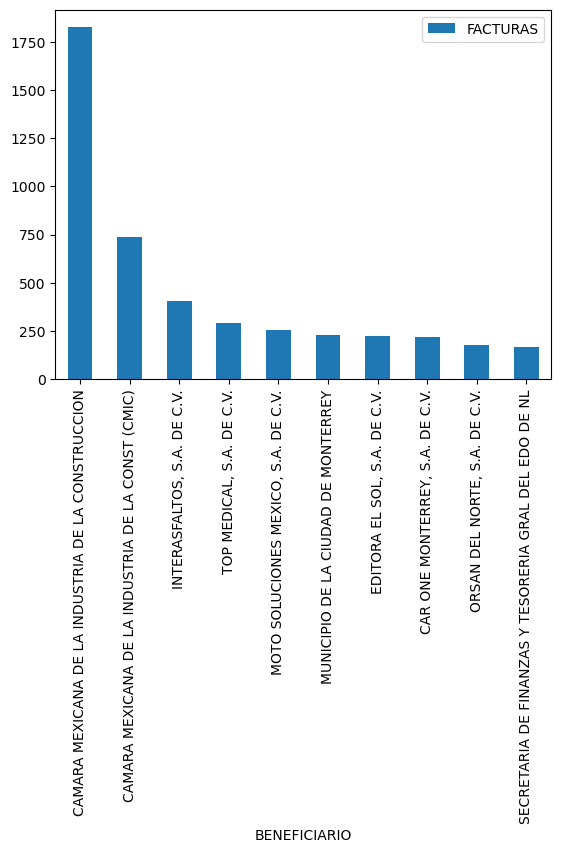

In [317]:
# Graficamos los 10 Beneficiarios con más Facturas
facturas_beneficiario.reset_index().sort_values(by='FACTURAS', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO',y='FACTURAS')

### **ANÁLISIS DE TEXTO**

In [350]:
!pip install nltk

In [358]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mariela.ortiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [362]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --------- ----------------------------- 71.7/301.4 kB 777.7 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.1 MB/s eta 0:00:00


In [364]:
texto_compras=''

In [406]:
for row in compras_df_2024['CONCEPTO']:
    texto_compras=texto_compras+' '+row

In [410]:
stopwords_list=stopwords.words('spanish')+['municipio','león','sis','leon']

In [412]:
# Eliminamos los espacios en blanco del inicio y fin de las palabras, ponemos en minúsculas
# Controlamos la longitud de las palabras y unimos con la función join
texto_compras=' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [413]:
wc= WordCloud(background_color='white')
wc.generate(texto_compras)

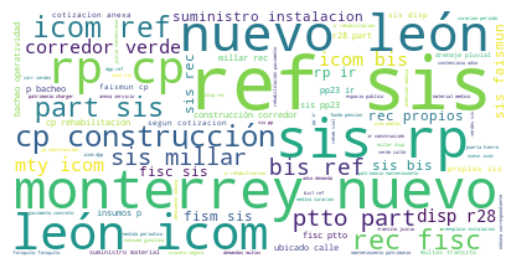

In [415]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()